# Markov Text Classifier
Text classification using markov models. In this experiment, we classify betweem poems of different authors.

# Import Dependencies

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score,ConfusionMatrixDisplay


# Download Dataset

In [2]:
!rm -r data
!git clone https://github.com/Q-b1t/G.A.I_MISCELLANEUS_RESOURCES.git
!mkdir data
!cp G.A.I_MISCELLANEUS_RESOURCES/poems/* data

rm: cannot remove 'data': No such file or directory
Cloning into 'G.A.I_MISCELLANEUS_RESOURCES'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 91 (delta 14), reused 81 (delta 7), pack-reused 0
Receiving objects: 100% (91/91), 21.00 MiB | 13.30 MiB/s, done.
Resolving deltas: 100% (14/14), done.


# Import classifier

In [3]:
!rm -r mp_classifier
!git clone https://github.com/Q-b1t/MARKOV_MODELS.git
!cp -r MARKOV_MODELS/mp_classifier .

rm: cannot remove 'mp_classifier': No such file or directory
Cloning into 'MARKOV_MODELS'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
Receiving objects: 100% (14/14), done.
remote: Total 14 (delta 4), reused 14 (delta 4), pack-reused 0
Resolving deltas: 100% (4/4), done.


In [4]:
from mp_classifier.MarkovClassifier import *
from mp_classifier.TextClassificationDataset import *

# Instance Dataset

In [5]:
text_dataset = TextClassificationDataset(
    data_path = 'data'
)

[~] parsing edgar_allan_poe.txt


797it [00:00, 31365.39it/s]


[~] parsing robert_frost.txt


1581it [00:00, 53441.60it/s]


[~] creating vocabulary...


100%|██████████| 1723/1723 [00:00<00:00, 59418.59it/s]


[~] tokenizing training data...


100%|██████████| 1723/1723 [00:00<00:00, 90933.85it/s]


[~] tokenizing test data...


100%|██████████| 431/431 [00:00<00:00, 51529.13it/s]


In [6]:
# retrive the processed dataset
train_data,test_data = text_dataset.get_data()

In [7]:
for k,v in train_data.items():
  print(k,len(v))

samples 1723
labels 1723
tokenized 1723


In [8]:
# test tokenizer
index = 1000
sample,label,tokenized = train_data["samples"][index],train_data["labels"][index],train_data["tokenized"][index]
sample,label,tokenized

('and those will bear some keeping still about',
 1,
 [27, 1397, 175, 64, 172, 1139, 323, 392])

In [9]:
text_dataset.tokenize_sentence(sample)

[27, 1397, 175, 64, 172, 1139, 323, 392]

In [10]:
text_dataset.detokenize_sentence(text_dataset.tokenize_sentence(sample))

'and those will bear some keeping still about'

In [11]:
vocabulary = text_dataset.get_vocabulary()
vocabulary.keys()

dict_keys(['vocab', 'reverse', 'label_2_class'])

In [12]:
vocabulary["label_2_class"]

{0: 'edgar_allan_poe.txt', 1: 'robert_frost.txt'}

# Instance and train a classifier

In [13]:
classifier = MarkovTextClassifier(
    data = train_data,
    vocabulary=vocabulary
)

classifier.fit()

In [14]:
params = classifier.get_params()
params

{0: (array([[-7.8713112 , -7.8713112 , -7.8713112 , ..., -7.8713112 ,
          -7.8713112 , -7.8713112 ],
         [-7.87207398, -7.87207398, -6.77346169, ..., -7.87207398,
          -7.87207398, -7.87207398],
         [-7.96311206, -7.96311206, -7.96311206, ..., -7.96311206,
          -7.96311206, -7.96311206],
         ...,
         [-7.8713112 , -7.8713112 , -7.8713112 , ..., -7.8713112 ,
          -7.8713112 , -7.8713112 ],
         [-7.8713112 , -7.8713112 , -7.8713112 , ..., -7.8713112 ,
          -7.8713112 , -7.8713112 ],
         [-7.8713112 , -7.8713112 , -7.8713112 , ..., -7.8713112 ,
          -7.8713112 , -7.8713112 ]]),
  array([-8.07028089, -6.9716686 , -4.51493283, ..., -8.07028089,
         -8.07028089, -8.07028089])),
 1: (array([[-7.8713112 , -7.8713112 , -7.8713112 , ..., -7.8713112 ,
          -7.8713112 , -7.8713112 ],
         [-7.87283618, -7.87283618, -7.87283618, ..., -7.87283618,
          -7.87283618, -7.87283618],
         [-8.01763716, -8.01763716, -8.017

In [15]:
priors = classifier.get_priors()
priors

{0: -1.09397997001983, 1: -0.4077893392532448}

In [16]:
train_tokens, test_tokens = train_data['tokenized'],test_data['tokenized']
y_train,y_test = train_data['labels'],test_data['labels']

In [17]:
p_train = classifier.predict(train_tokens)
p_test = classifier.predict(test_tokens)

In [18]:
print(f"[~] Train acc: {np.mean(p_train == y_train)}")
print(f"[~] Test acc: {np.mean(p_test == y_test)}")

[~] Train acc: 0.9970980847359258
[~] Test acc: 0.839907192575406


In [19]:
print(f"[~] F1 Score Train: {f1_score(y_train, p_train)}")
print(f"[~] F1 Score Test: {f1_score(y_test, p_test)}")

[~] F1 Score Train: 0.9978232477144101
[~] F1 Score Test: 0.8899521531100479


In [20]:
cm_train,cm_test = confusion_matrix(y_train, p_train),confusion_matrix(y_test, p_test)
cm_train,cm_test

(array([[ 572,    5],
        [   0, 1146]]),
 array([[ 83,  58],
        [ 11, 279]]))

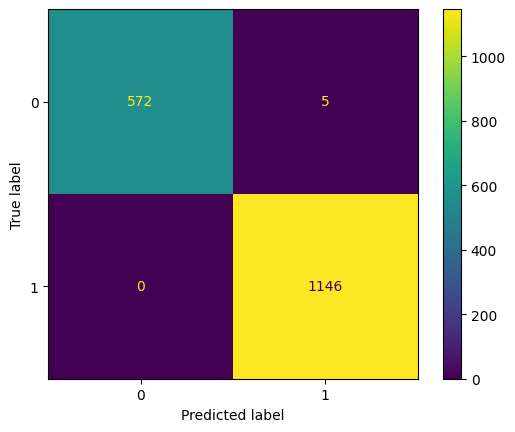

In [21]:
ConfusionMatrixDisplay.from_predictions(y_train, p_train)

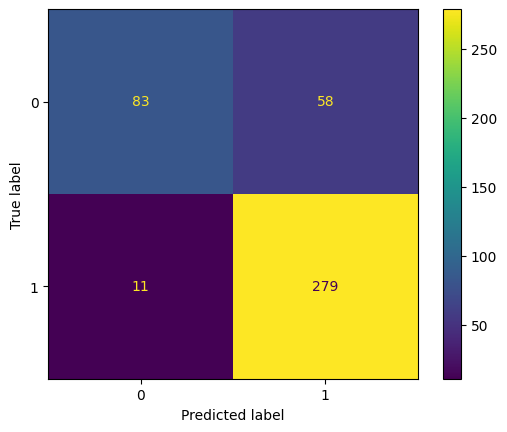

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, p_test)